<a href="https://colab.research.google.com/github/RodriCalle/ComplejidadAlgoritmica/blob/main/10_Dijkstra_or_Uniform_Cost_Search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import graphviz as gv
import numpy as np
import pandas as pd

import heapq as hq
import math

In [2]:
def readAdjl(fn, haslabels=False, weighted=False, sep="|"):
  with open(fn) as f:
    labels = None
    if haslabels:
      labels = f.readline().strip().split()
    L = []
    for line in f:
      if weighted:
        L.append([tuple(map(int, p.split(sep))) for p in line.strip().split()])
        # line => "1|3 2|5 4|4" ==> [(1, 3), (2, 5), (4, 4)]
      else: 
        L.append(list(map(int, line.strip().split()))) # "1 3 5" => [1, 3, 5]
        # L.append([int(x) for x in line.strip().split()])
  return L, labels

def adjlShow(L, labels=None, directed=False, weighted=False, path=[], layout="sfdp"):
  g = gv.Digraph("G") if directed else gv.Graph("G")
  g.graph_attr["layout"] = layout
  g.edge_attr["color"] = "gray"
  g.node_attr["color"] = "orangered"
  g.node_attr["width"] = "0.1"
  g.node_attr["height"] = "0.1"
  g.node_attr["fontsize"] = "8"
  g.node_attr["fontcolor"] = "mediumslateblue"
  g.node_attr["fontname"] = "monospace"
  n = len(L)
  for u in range(n):
    g.node(str(u), labels[u] if labels else str(u))
  added = set()
  for v, u in enumerate(path):
    if u != None:
      g.edge(str(u), str(v), dir="forward", penwidth="2", color="orange")
      added.add(f"{u},{v}")
      added.add(f"{v},{u}")
  if weighted:
    for u in range(n):
      for v, w in L[u]:
        if not directed and not f"{u},{v}" in added:
          added.add(f"{u},{v}")
          added.add(f"{v},{u}")
          g.edge(str(u), str(v), str(w))
        elif directed:
          g.edge(str(u), str(v), str(w))
  else:
    for u in range(n):
      for v in L[u]:
        if not directed and not f"{u},{v}" in added:
          added.add(f"{u},{v}")
          added.add(f"{v},{u}")
          g.edge(str(u), str(v))
        elif directed:
          g.edge(str(u), str(v))
  return g

In [3]:
%%file 1.in
1|3 3|6 4|4
0|3 2|8 5|9
1|8
0|6 7|6
0|4 7|1
1|9 7|4
7|5
3|6 4|1 5|4 6|5

Writing 1.in


In [4]:
G, _ = readAdjl("1.in", weighted=True)
for i, edges in enumerate(G):
  print(f"{i:2}:{edges}")

 0:[(1, 3), (3, 6), (4, 4)]
 1:[(0, 3), (2, 8), (5, 9)]
 2:[(1, 8)]
 3:[(0, 6), (7, 6)]
 4:[(0, 4), (7, 1)]
 5:[(1, 9), (7, 4)]
 6:[(7, 5)]
 7:[(3, 6), (4, 1), (5, 4), (6, 5)]


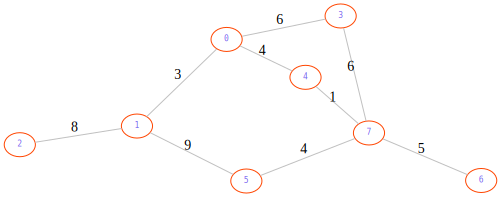

In [5]:
adjlShow(G, weighted=True)

In [6]:
def dijkstra(G, start):
  n = len(G)
  visited = [False]*n
  parents = [None]*n
  cost = [math.inf] * n
  q = []
  hq.heappush(q, (0,start))
  while q:
    g_u, u = hq.heappop(q)
    if not visited[u]:
      visited[u] = True
      for v, w in G[u]:
        f = g_u + w
        if not visited[v] and f < cost[v]:
          cost[v] = f
          parents[v] = u
          hq.heappush(q, (f,v))

  return parents, cost

[4, 0, 1, 7, None, 7, 7, 4]


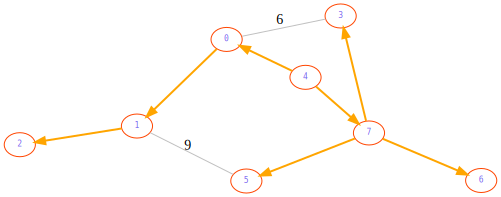

In [7]:
path, cost = dijkstra(G, 4)
print(path)
adjlShow(G, path=path, weighted=True)